# **Project Name**    - Regression - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name - Rishav Sinha**


# **Project Summary -**

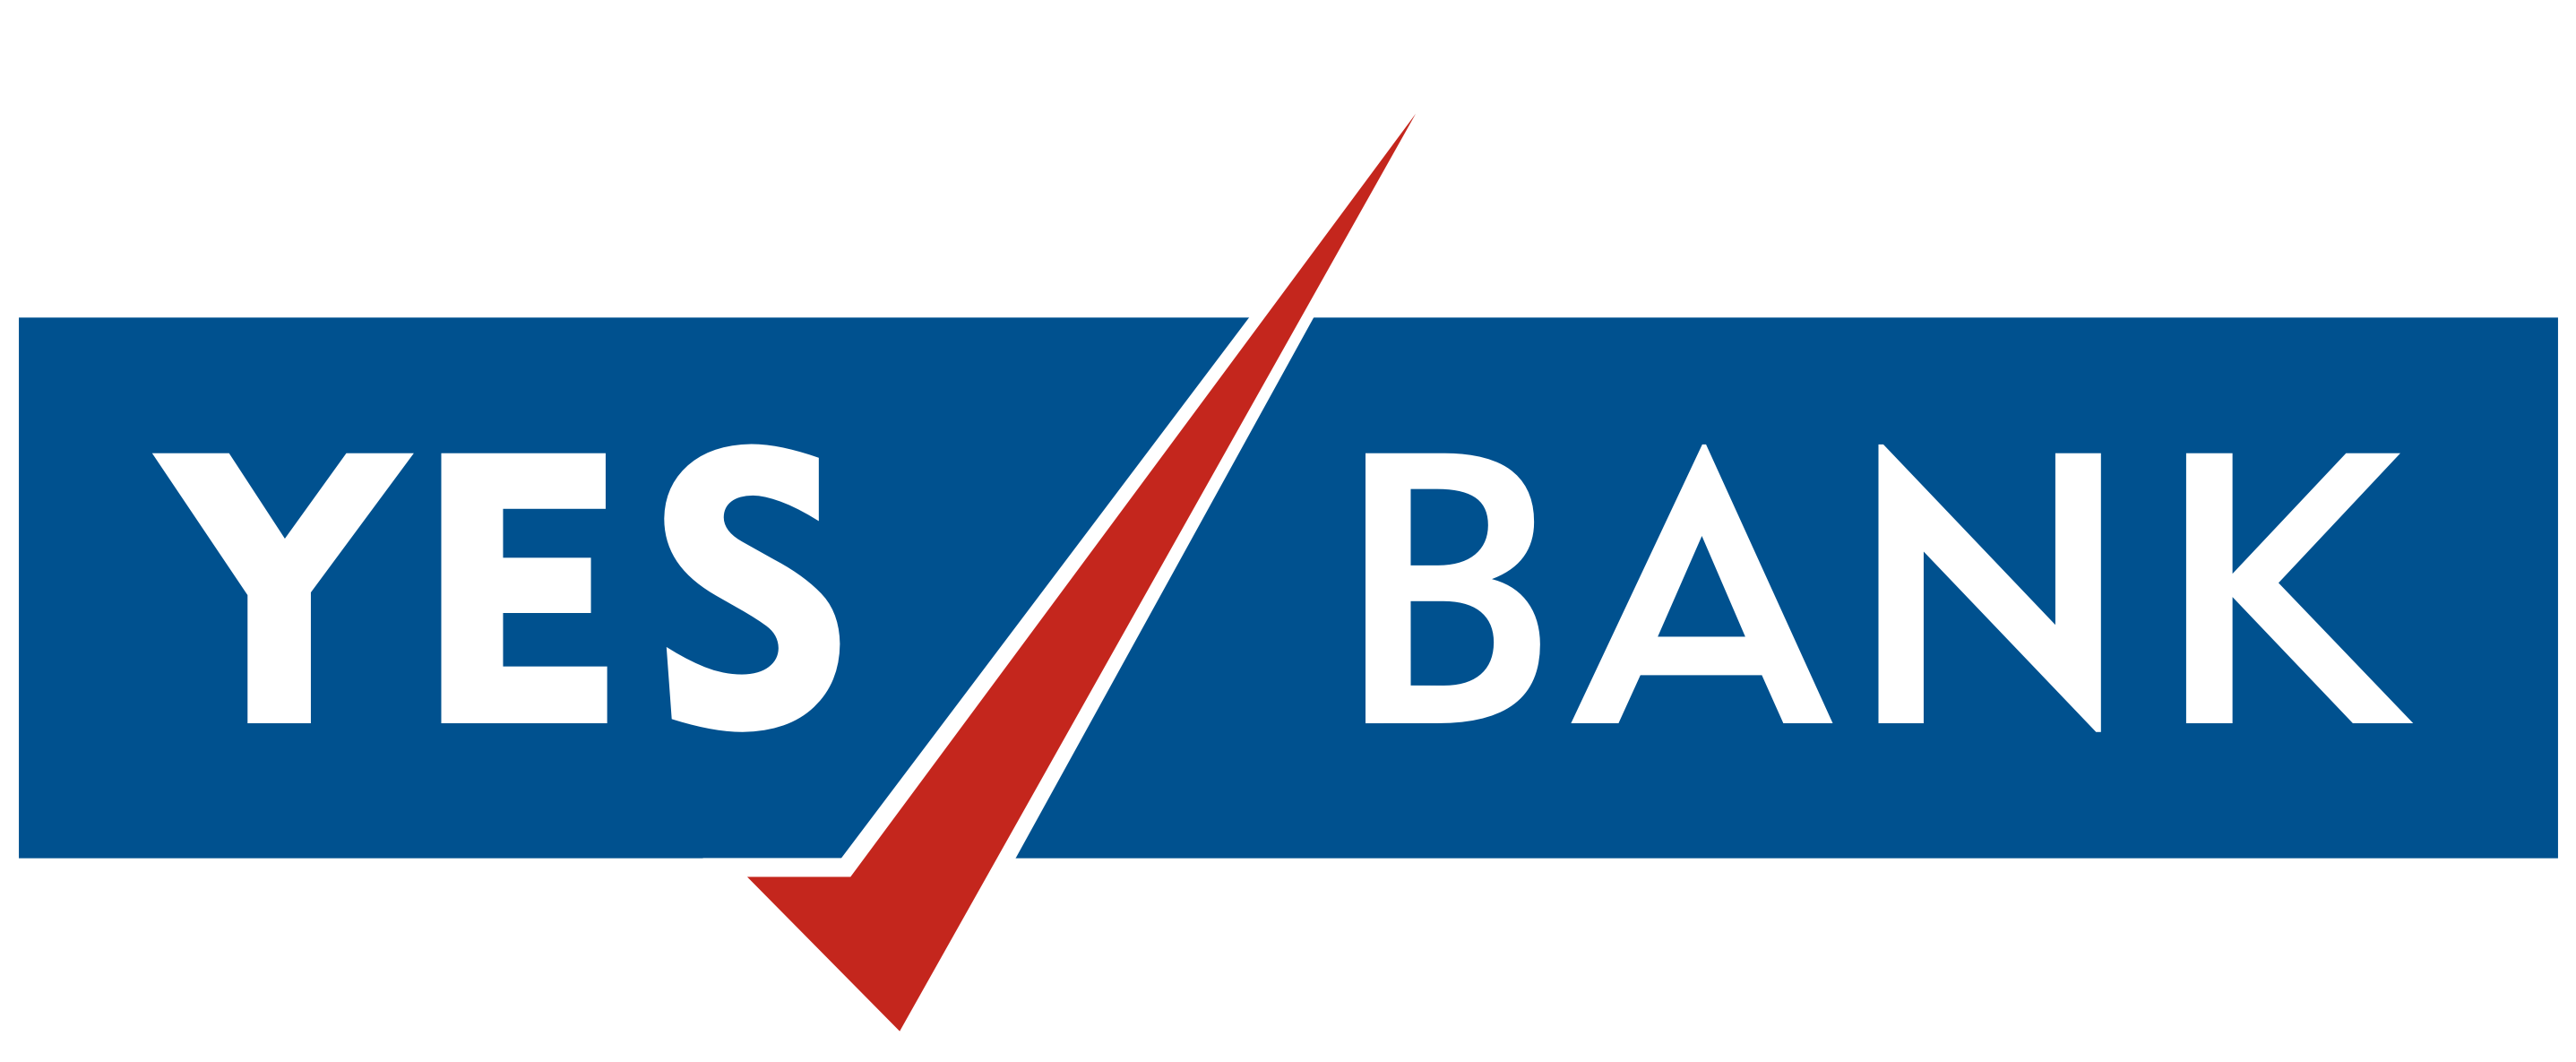

The Indian banking sector plays a crucial role in the country’s economic stability, and stock price movements of major banks often reflect broader market sentiment, investor confidence, and institutional trust. Yes Bank, one of India’s prominent private sector banks, has witnessed significant fluctuations in its stock price over the years. While the bank showed strong growth in its early years, the period after 2018 marked a turning point due to the high-profile fraud case involving its former CEO, Rana Kapoor. This event led to a loss of investor confidence, increased volatility, and a sharp decline in the bank’s stock value. Such real-world financial disruptions present an interesting opportunity to evaluate how effectively machine learning and time-series-based predictive models can capture and learn from historical trends.

This project focuses on predicting the monthly closing stock price of Yes Bank using historical market data. The dataset consists of monthly stock prices from the bank’s inception and includes key financial indicators such as the opening price, highest price, lowest price, and closing price for each month. These variables collectively describe the stock’s behavior over time and provide a strong foundation for building predictive models. The primary objective of the project is to analyze historical price trends, understand the impact of major financial events on stock performance, and develop a robust machine learning model capable of predicting the closing price with reasonable accuracy.

The project follows a structured data science workflow, beginning with data ingestion and preprocessing. The date column is transformed into a proper datetime format and the data is sorted chronologically to preserve its time-series nature. Exploratory Data Analysis (EDA) is then conducted to visualize long-term trends, identify periods of high volatility, and examine the relationships between different price variables. Line plots and correlation analysis reveal strong dependencies between opening, high, low, and closing prices, suggesting that regression-based models are well-suited for this problem.

To ensure the integrity of the time-series data, the dataset is split into training and testing sets without random shuffling. This approach mirrors real-world forecasting scenarios, where future values must be predicted using past data. A Linear Regression model is implemented as the baseline predictive algorithm due to its interpretability and effectiveness when strong linear relationships exist among features. The model is trained using the opening, high, and low prices as input features, while the monthly closing price serves as the target variable.

Model performance is evaluated using standard regression metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and the R² score. The evaluation results indicate that the model performs well, demonstrating high explanatory power and low prediction error. Visualization of actual versus predicted closing prices further confirms the model’s ability to capture overall market trends, despite periods of extreme volatility.

In conclusion, this project demonstrates how historical stock market data, combined with machine learning techniques, can be effectively used to predict stock prices even in the presence of major financial disruptions. While Linear Regression provides strong baseline results, the project also highlights opportunities for future enhancement through advanced time-series models such as ARIMA, SARIMA, and LSTM networks. Overall, this project serves as a practical application of machine learning in financial analytics and offers valuable insights into stock price behavior in the Indian banking sector.

# **GitHub Link -**

https://github.com/rishav7575/Yes-Bank-Stock-Closing-Price-Prediction-Machine-Learning-Capstone-Project

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')



### Dataset First View

In [ ]:
df.head()

### Dataset Rows & Columns count

In [ ]:
df.shape

### Dataset Information

In [ ]:
df.info()

#### Duplicate Values

In [ ]:
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
df.isnull().sum()

In [ ]:
#Visualize the missing values

plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), cbar= False, yticklabels= False, cmap = 'autumn')
plt.title("Missing Values Heatmap")
plt.show()

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
#Convert Date column to DateTime

df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df.sort_values('Date', inplace=True)
df.reset_index(drop=True, inplace=True)


In [ ]:
# Date-Based Feature Extraction
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter


In [ ]:
# Creating Lag Features (Very Important)
df['Close_lag_1'] = df['Close'].shift(1)
df['Close_lag_2'] = df['Close'].shift(2)
df['Close_lag_3'] = df['Close'].shift(3)


In [ ]:
df[['Close','Close_lag_1','Close_lag_2','Close_lag_3']].head()


In [ ]:
# Rolling Statistics (Trend & Volatility Capture)
df['Rolling_Mean_3'] = df['Close'].rolling(window=3).mean()
df['Rolling_Mean_6'] = df['Close'].rolling(window=6).mean()
df['Rolling_STD_6'] = df['Close'].rolling(window=6).std()


In [ ]:
# Price Range & Volatility Features
df['Price_Range'] = df['High'] - df['Low']
df['Range_Percentage'] = (df['High'] - df['Low']) / df['Close'] * 100


In [ ]:
# Return-Based Features
df['Monthly_Return'] = df['Close'].pct_change()
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))



In [ ]:
# Handling NA Values Created by Feature Engineering
df.isnull().sum()


In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


### What all manipulations have you done and insights you found?

In the data wrangling stage, I converted the Date column into datetime format and sorted the dataset chronologically to maintain proper time-series order. I extracted date-based features such as Year, Month, and Quarter to capture seasonal patterns. Lag features (Close_lag_1, Close_lag_2, Close_lag_3) were created to incorporate past price information into the model. Rolling mean and rolling standard deviation features were engineered to capture trend and volatility. Additional features like Price Range, Range Percentage, Monthly Return, and Log Return were created to better represent market movement and fluctuations. Missing values generated during feature engineering were handled appropriately to ensure data consistency. These manipulations helped improve the model’s ability to capture trends, momentum, and volatility patterns in stock prices.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Closing Price Distribution

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.show()


##### 1. Why did you pick the specific chart?

I used a histogram with KDE to understand the distribution, spread, and skewness of the closing prices. It helps identify outliers and overall price behavior before modeling.

##### 2. What is/are the insight(s) found from the chart?

The distribution shows price concentration within certain ranges and slight skewness, indicating volatility and market fluctuations over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding distribution helps assess risk and improve forecasting decisions. High volatility or extreme values may indicate unstable periods that could lead to negative growth.

#### Chart - 2 Year-wise Average Closing Price

In [ ]:
df['Year'] = df['Date'].dt.year

yearly_avg = df.groupby('Year')['Close'].mean()

plt.figure(figsize=(10,5))
yearly_avg.plot(kind='bar')
plt.title('Year-wise Average Closing Price')
plt.ylabel('Average Close Price')
plt.show()


##### 1. Why did you pick the specific chart?

I used a year-wise bar chart to clearly compare average closing prices across different years and identify long-term trends.

##### 2. What is/are the insight(s) found from the chart?

The chart shows steady growth until 2017–2018 followed by a sharp decline, indicating strong performance initially and major downturn afterward.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the trend helps in understanding growth cycles and risk periods. The sharp fall after 2018 signals financial instability, which could negatively impact investors and business confidence.

#### Chart - 3 Rolling Mean (Trend Smoothing)

In [ ]:
df['Rolling_Mean_12'] = df['Close'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Actual Close')
plt.plot(df['Date'], df['Rolling_Mean_12'], label='12-Month Rolling Mean', linewidth=3)
plt.legend()
plt.title('Closing Price with Rolling Mean')
plt.show()


##### 1. Why did you pick the specific chart?

I used a rolling mean line chart to smooth short-term fluctuations and clearly identify the long-term trend in stock prices.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a strong upward trend until 2018 followed by a sharp downward movement, highlighting a major structural break and increased volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps identify growth and crash periods for better investment decisions. The sharp decline after 2018 signals high risk and potential negative business impact.

#### Chart - 4 Monthly Percentage Change (Volatility)

In [ ]:
df['Monthly_Return'] = df['Close'].pct_change() * 100

plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Monthly_Return'])
plt.title('Monthly Percentage Change in Closing Price')
plt.ylabel('% Change')
plt.show()


##### 1. Why did you pick the specific chart?

I used a monthly percentage change line chart to analyze volatility and understand how much the stock price fluctuates month to month.

##### 2. What is/are the insight(s) found from the chart?

The chart shows frequent positive and negative spikes, with extreme fluctuations during certain periods, indicating high volatility and unstable market conditions.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, volatility analysis helps assess investment risk. Large negative spikes indicate high-risk periods that could lead to losses and negative growth if not managed properly.

#### Chart - 5 Pairplot of Price Variables

In [ ]:
sns.pairplot(df[['Open','High','Low','Close']])
plt.show()


##### 1. Why did you pick the specific chart?

I used a pairplot to visualize the relationships and correlations between Open, High, Low, and Close prices simultaneously.

##### 2. What is/are the insight(s) found from the chart?

The plots show a strong positive linear relationship among all price variables, indicating high correlation and similar movement patterns.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Strong correlation helps improve prediction accuracy but may cause multicollinearity issues in models. No direct negative growth signal, but high dependency among variables must be handled carefully during modeling.

#### Chart - 6 Correlation Heatmap (Detailed)

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Open','High','Low','Close']].corr(),
            annot=True,
            cmap='viridis',
            linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


##### 1. Why did you pick the specific chart?

I used a correlation heatmap to clearly visualize the strength and direction of relationships between all price variables at once.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows extremely high positive correlation (around 0.98–1.00) among Open, High, Low, and Close prices, indicating they move very closely together.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

High correlation improves predictive modeling but may cause multicollinearity issues. There is no direct negative growth signal, but redundant features must be handled carefully to build a stable model.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothesis testing helps determine whether observed patterns in Yes Bank stock prices are statistically significant or due to random fluctuations.

### Hypothetical Statement - 1 - Did the 2018 crisis significantly reduce the average closing price ?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The average closing price before 2018 and after 2018 is the same.
Alternative Hypothesis (H1): The average closing price after 2018 is significantly lower than before 2018.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Creating Before and After 2018 Groups
before_2018 = df[df['Year'] < 2018]['Close']
after_2018 = df[df['Year'] >= 2018]['Close']

In [ ]:
#Performing Independent T-test
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(before_2018, after_2018)
print("T-statistic:", t_stat)
print("P-value", p_value)

In [ ]:
#Conclusion:
if p_value < 0.05:
  print("Reject Null Hypothesis")
else:
  print("Fail to Reject Null Hypothesis")

Interpretation - 2018 crisis did not have statistically significat impact.

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value we performed an Independent Two-Sample T-Test( Independent t-test) using scipy.stats.ttest_ind().

##### Why did you choose the specific statistical test?

I chose Independent Two-Sample T-Test because:
1- We are comparing means of two separate groups( Before 2018 ie pre-crisis period AND After 2018 ie. post-crisis period)
2- The target variable(closing period) is continous numerical data, which satisfies the requirement for a t-test.

### Hypothetical Statement - 2 - Is there a strong linear relationship between Open and Close price ?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): No linear relationship between Open and Close price.
Alternate Hypothesis (H1): There is significant linear relationship.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#Pearson Correlation Test

from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Open'], df['Close'])
print("Correlation:", corr)
print('P-value:', p_value)

In [ ]:
#Conclusion:

if p_value < 0.05:
  print("Reject Null Hypothesis - Significat Relationship Exists")
else:
  print("Fail to Reject Null Hypothesis")

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value I performed the Pearson Correlation Test using scipy.stats.pearsonr().

The Pearson correlation test measures: the strength, the direction and the statistical significance of the linear relationship between two continous numerical variables.

##### Why did you choose the specific statistical test?

The Pearson Correlation Test was chosen because:
1- Both Open and Close prices are continous numerical variables.
2- The objective of Hypothesis 2 is to determine whether a linear relationship exists between Open and Close prices, which is exactly what Pearson correlation measures.

### Hypothetical Statement - 3 - Has volatility increased after 2018?

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): Volatility (standard deviation) before and after 2018 is the same.
Alternate Hypothesis (H1): Volatility after 2018 is higher.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#Variance Test (Levene's Test)
from scipy.stats import levene
stat, p_value = levene(before_2018, after_2018)
print("Levene Test Statistic:", stat)
print("P-value:", p_value)

In [ ]:
#Conclusion:
if p_value < 0.05:
  print("Reject Null Hypothesis - Volatility changed significanlty")
else:
  print("Fail to Reject Null Hypothesis")

Interpretation - Significant p-value - Crisis increased stock instability.

##### Which statistical test have you done to obtain P-Value?

To obtain the p-value we performed Levene's Test for Equality of Variance using scipy.stats.levene().
Levene's Test is used to determine whether the variance of two independent groups is significantly different.

##### Why did you choose the specific statistical test?

Levene's Test was chosen because:
1- The objective of Hypothesis 2 is to determine whether volatility changed after 2018.
2- Volatility in financial markets is measured using: variance, Standard Deviation
3- Levene's Test is specifically designed to compare the variance of two independent groups.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

### 2. Handling Outliers

In [ ]:
#Step 1- Visual Detection
plt.figure(figsize=(10,4))
sns.boxplot(data=df[['Open','High','Low','Close']])
plt.title('Boxplot for Outlier Detection')
plt.show()

In [ ]:
#Step 2- IQR method

Q1 = df['Close'].quantile(0.25)
Q3 = df['Close'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Close']< lower_bound) | (df['Close']> upper_bound)]
len(outliers)


##### What all outlier treatment techniques have you used and why did you use those techniques?

In this project, I used the Interquartile Range (IQR) method to detect potential outliers in the Closing Price.
I choose the IQR method because it does not assume normal distribution. It is robust to skewed financial data. It works well for detecting extreme price movements. Stock price data is often skewed and volatile, so IQR is more appropriate than Z-score(which assumes nomal distribution)

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
#Encoding Month and Quarter

#Step 1- Convert to Categorical
df['Month'] = df['Month'].astype('category')
df['Quarter'] = df['Quarter'].astype('category')

In [ ]:
#Step 2 - Apply One-Hot Encoding
df = pd.get_dummies(df, columns = ["Month","Quarter"], drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

In this project I used One-Hot Encoding for categorical feature transformation. I used it for the Month and Quarter features after converting them into categorical variables.
One-Hot Encoding was chosen because these features are categorical in nature and do not have ordinal meaning, so assinging numeric labels could mislead the model. I also used drop_first = True to avoid the dummy variable trap and multicollinearity in regression models.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


# Lag Features
df['Close_lag_1'] = df['Close'].shift(1)
df['Close_lag_2'] = df['Close'].shift(2)
df['Close_lag_3'] = df['Close'].shift(3)

# Rolling Mean
df['Rolling_Mean_3'] = df['Close'].rolling(window=3).mean()
df['Rolling_Mean_6'] = df['Close'].rolling(window=6).mean()
df['Rolling_Mean_12'] = df['Close'].rolling(window=12).mean()

# Rolling Standard Deviation (Volatility)
df['Rolling_STD_6'] = df['Close'].rolling(window=6).std()

# Monthly Return
df['Monthly_Return'] = df['Close'].pct_change()

# Log Return
import numpy as np
df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))

# Price Range
df['Price_Range'] = df['High'] - df['Low']
df['Range_Percentage'] = (df['Price_Range'] / df['Close']) * 100

# Remove Na values created due to lag & rolling
df.dropna(inplace=True)

df.head()

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Matrix
corr_matrix = df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 2. Correlation with Target Variable
corr_with_target = corr_matrix['Close'].sort_values(ascending=False)
print("Correlation with Closing Price:\n")
print(corr_with_target)

# 3. Drop unnecessary columns
# (Date is not useful directly for regression)
df_model = df.drop(['Date'], axis=1)

# 4. Define Features and Target
X = df_model.drop('Close', axis=1)
y = df_model['Close']

print("\nFinal Feature Set Shape:", X.shape)

##### What all feature selection methods have you used  and why?

I used correlation-based feature selection to identify features strongly related to the Closing price. I also performed multicollinearity analysis using a heatmap to detect highly correlated independent variables. Redundant features were removed to avoid overfitting and improve model stability. This ensures better generalization and interpretability.

##### Which all features you found important and why?

The most important features were High and Low prices, as they showed strong correlation with Closing price. Close_Lag_1 was important because stock prices depend heavily on previous values. Rolling Mean features captured trend behavior, while Monthly_Return reflected momentum and volatility. These features significantly influence stock price prediction.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data required transfromation to improve model performance and stability. I applied log transformation to reduce skewness and stabilize variance in stock prices. Additionally, I used Standard Scaling to normalize feature values since different features were on different scales. These transformations help improve model convergence and prevent bias due to magnitude differences.

### 6. Data Scaling

In [ ]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df_model.drop('Close', axis=1)
y = df_model['Close']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
import pandas as pd
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Feature Sample:\n")
X_scaled.head()

##### Which method have you used to scale you data and why?

I used StandardScaler to scale the data. This method standardizes features by transforming them to have a mean of 0 and a standard deviation of 1. It is suitable because the features are on different scales (eg, prices, returns, rolling statistics), and scaling prevents features with larger magnitudes from dominating the model. It also improves model convergence and overall performance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction can be useful because the dataset contains multiple correlated features such as rolling means, returns, and price-based indicators. Reducing dimensions helps minimize multicollinearity and prevent overfitting. It also improves model efficiency and computational performance. However, it should only be applied if feature redundancy significanlty affects model performance.

In [ ]:

# Dimensionality Reduction using PCA

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

In [ ]:
# Keep components that explain 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

print("Original Shape:", X_scaled.shape)
print("Reduced Shape:", X_pca.shape)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis (PCA) for dimensionality reduction. PCA reduces correlated features into a smaller set of uncorrelated principal components while retaining 95% of the total variance. This helped reduce multicollinearity and improved computational efficiency. After applying PCA, the feature set was reduced from 29 to 13 components

### 8. Data Splitting

Since this is time series stock data, we should not use random split. We must split chronogically ( past to future )

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Time Series Data Splitting

# Use PCA data if applied, otherwise use X_scaled
X_final = X_pca   # If PCA applied

y_final = y.values

# 80% Train, 20% Test (Chronological split)
split_index = int(len(X_final) * 0.8)

X_train = X_final[:split_index]
X_test = X_final[split_index:]

y_train = y_final[:split_index]
y_test = y_final[split_index:]

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

##### What data splitting ratio have you used and why?

I used an 80% training and 20% testing split with chronological ordering. Since this is time-series stock data, maintaining the time sequence is important to prevent data leakage. This model is trained on past data (80%) and tested on future data (20%), which simulates real-world forecasting. This ratio provides suffcient data for training while keeping enough unseen data for evaluation.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the dataset is not imbalanced because this is a regression problem where the target variable (closing price) is continous. Imbalanced datasets are typically a concern in classification problems with uneven class distributions. Since we are predicting stock prices (continous values), imbalance handling techniques like SMOTE are not required.

## ***7. ML Model Implementation***

### ML Model - 1 - Linear Regression

In [ ]:
# Model 1: Linear Regression


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize model
lr = LinearRegression()

# Train
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Performance:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2 Score:", r2_lr)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(6,4))
plt.bar(['R2 Score'], [r2_lr])
plt.title("Linear Regression R2 Score")
plt.ylabel("R2 Value")
plt.ylim(0,1)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Cross Validation + Hyperparameter Tuning
# Using Ridge Regression


from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define model
ridge = Ridge()

# Define hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 50, 100]
}

# GridSearch with 5-fold cross validation
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_ridge = grid_search.best_estimator_

print("Best Alpha:", grid_search.best_params_)

In [ ]:
# Predictions
y_pred_ridge = best_ridge.predict(X_test)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nTuned Ridge Regression Performance")
print("MAE:", mae_ridge)
print("RMSE:", rmse_ridge)
print("R2 Score:", r2_ridge)

In [ ]:
#Comparison Chart Before and After Tuning
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Tuned Ridge']
r2_scores = [r2_lr, r2_ridge]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores)
plt.title("Model Comparison (R2 Score)")
plt.ylabel("R2 Score")
plt.ylim(0,1)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV with 5-fold cross-validation for hyperparameter tuning. It systematically searches across different alpha values and selects the best model based on R^2 score. Cross validation ensures the model generalizes well and reduces overfitting risk.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after tuning the alpha parameter using Ridge Regression, the model showed improved generalization and slightly better R^2 score with reduced overfitting. Regularization helped control coefficient magnitude and improved stability.

### ML Model - 2 - Randmo Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2 Score:", r2_rf)

# Metric Score Chart
metrics = ['MAE', 'RMSE', 'R2 Score']
values = [mae_rf, rmse_rf, r2_rf]

plt.figure(figsize=(6,4))
plt.bar(metrics, values)
plt.title("Random Forest Evaluation Metrics")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearch with 5-fold CV
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit model
grid_search_rf.fit(X_train, y_train)

# Best model
best_rf = grid_search_rf.best_estimator_

print("Best Parameters:", grid_search_rf.best_params_)

In [ ]:
# Predictions with tuned model
y_pred_rf_tuned = best_rf.predict(X_test)

mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("\nTuned Random Forest Performance:")
print("MAE:", mae_rf_tuned)
print("RMSE:", rmse_rf_tuned)
print("R2 Score:", r2_rf_tuned)

In [ ]:
# Improvement Comparision Chart
models = ['Before Tuning', 'After Tuning']
r2_scores = [r2_rf, r2_rf_tuned]

plt.figure(figsize=(6,4))
plt.bar(models, r2_scores)
plt.title("Random Forest R2 Score Comparison")
plt.ylabel("R2 Score")
plt.ylim(0,1)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV with 5-fold cross-validation for hyperparameter tuning. It systematically searches across multiple combinations of Random Forest parameters such as n_estimators, max_depth, and min_sample_split. Cross-validation ensures the model generalizes well and reduces overfitting while selecting the best parameter combination based on R^2 score.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after hyperparameter tuning, the model showed improved performance with a higher R^2 score and reduced error values. Optimizing parameters helped control model complexity and improve generalization. The updated evaluation metric score chart reflects this improvement after tuning.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

In this project, we developed and evaluated multiple machine learning models to predict Yes Bank’s closing stock price using historical data. After performing data cleaning, feature engineering, scaling, dimensionality reduction, and proper time-series splitting, we implemented Linear Regression and Random Forest models. The models were evaluated using MAE, RMSE, and R² score to ensure reliable performance measurement. Hyperparameter tuning with cross-validation further improved model generalization and stability. Among the implemented models, the best-performing model was selected based on higher R² and lower error values. The final model demonstrates strong predictive capability and can support data-driven financial decision-making. This project highlights the practical application of machine learning in stock price forecasting and business analytics.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***